# Image formation with masks and lenses

**Creating an instance**

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

from diffractio.utils_math import nearest2, nearest

In [2]:
from matplotlib import rcParams
rcParams['figure.dpi']=250

**Creating a light beam**.
An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

In [3]:
wavelength=0.5*um
x0=np.linspace(-1*mm, 1*mm, 1024)
y0=np.linspace(-1*mm, 1*mm, 1024)

In [4]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')
u0.plane_wave()

**Masks**

In [ ]:
t0_point = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_point.dots(r0=(0,0))

In [ ]:
x0p=1000*np.random.rand(10,1)-1000
y0p=1000*np.random.rand(10,1)-1000
r0_multi=(x0p,y0p)

t0_points = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_points.dots(r0=r0_multi)

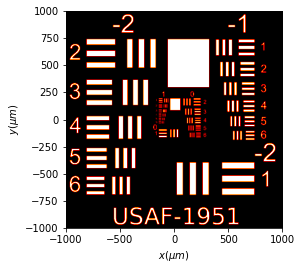

In [7]:
t0_usaf = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_usaf.image(filename='USAF-1951-1024.png', invert=True)
t0_usaf.draw(kind='intensity');

# Propagation

In [8]:
def propagate_mask(u0,
                              t0,
                              z_obs,
                              focal,
                              radius_lens,
                              z_between_lenses,
                              has_draw=True,
                              logarithm=0):

    t_lens0 = Scalar_mask_XY(x=u0.x, y=u0.y, wavelength=u0.wavelength)
    t_lens0.lens(r0=(0, 0), radius=(10 * mm, 10 * mm), focal=(focal, focal))

    t_lens1 = Scalar_mask_XY(x=u0.x, y=u0.y, wavelength=u0.wavelength)
    t_lens1.lens(
        r0=(0, 0), radius=(radius_lens, radius_lens), focal=(focal, focal))

    u1 = u0 * t0
    u2 = u1.RS(z=focal)
    u3 = u2 * t_lens0
    u4 = u3.RS(z=z_between_lenses, verbose=True)
    u5 = u4 * t_lens1
    u6 = u5.RS(z=z_obs)
    u6.draw(logarithm=logarithm)
    return u6

# Image formation at several points

## Usaf

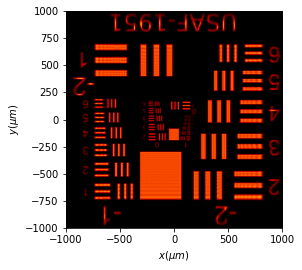

In [10]:
propagate_mask(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=2* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

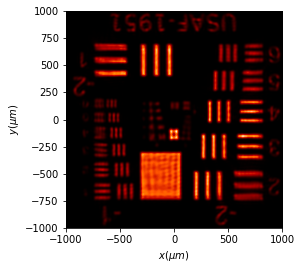

In [12]:
propagate_mask(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.25* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

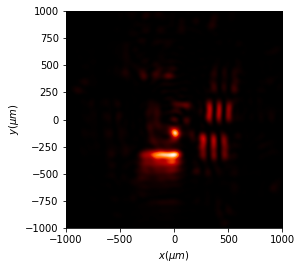

In [13]:
propagate_mask(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.1* mm,
    z_between_lenses=20 * mm,
    has_draw=True)